## Classificação de Imagens MNIST com um Modelo MLP

### Criar o dataset e o dataloader

In [1]:
import torch
import torchvision
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# carregar o dataset MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# criar os data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 467kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.92MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.84MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Visualizar amostras do conjunto de dados

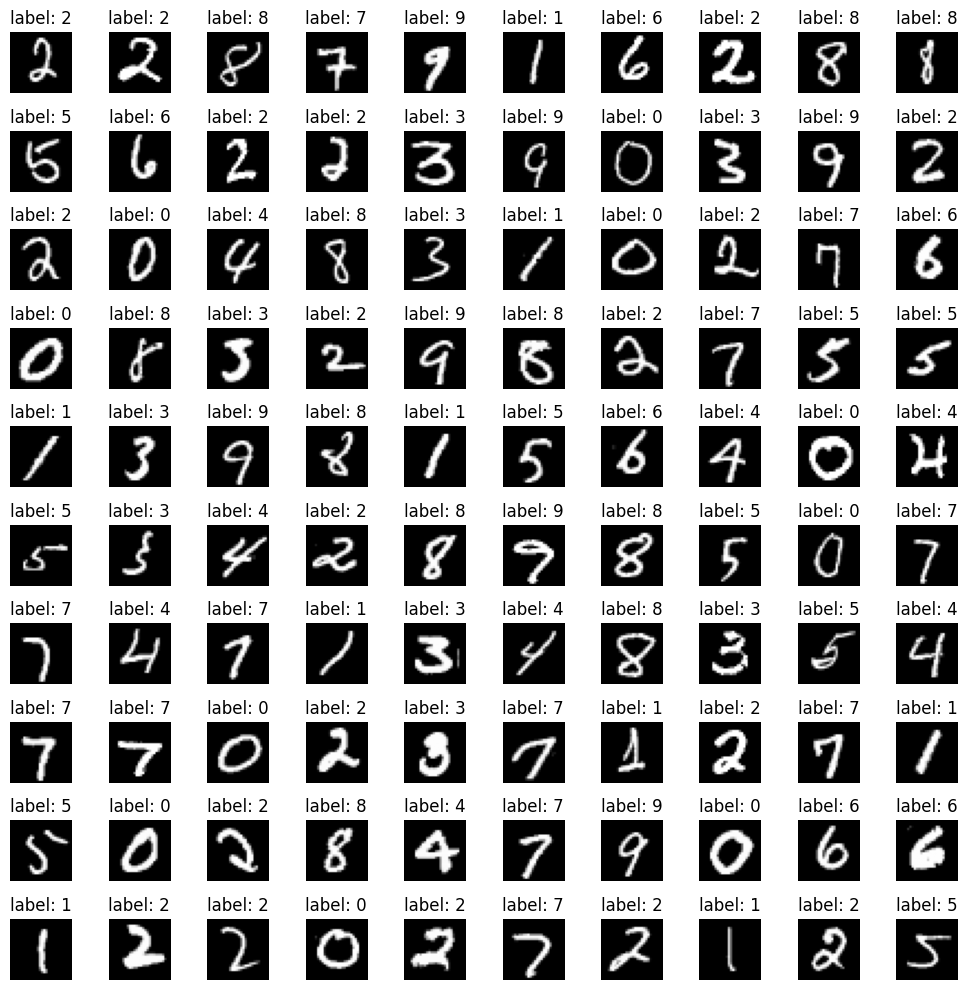

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Obter 100 índices aleatórios
indices = np.random.choice(len(train_dataset), size=100, replace=False)

# Obter as imagens e rótulos correspondentes
images = [train_dataset[i][0] for i in indices]
labels = [train_dataset[i][1] for i in indices]

# Criar uma figura com 10x10 subplots
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

# Iterar sobre os subplots e exibir as imagens com os labels
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f"label: {labels[i]}")
    ax.axis('off')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura
plt.show()


### Construir um Modelo MLP

In [4]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size=28*28, hidden_size=128, num_classes=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Achatar o tensor de entrada
        y = self.fc1(x)
        y = self.relu(y)
        y = self.fc2(y)
        y = self.relu(y)
        y = self.fc3(y)

        return y

# Criar uma instância do modelo MLP
model = MLP(hidden_size=256)
x = torch.randn(64, 1, 28, 28)
print(model)
print(model(x).shape)

# Imprimir o número de parâmetros
num_params = sum(p.numel() for p in model.parameters())
print(f"Número de parâmetros: {num_params:,}")

MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([64, 10])
Número de parâmetros: 269,322



### Definir a loss function e o otimizador

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Definir a  loss function e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Treinar o modelo

In [6]:
from tqdm import tqdm

num_epochs = 10

model.train()
for epoch in tqdm(range(num_epochs)):
    total_loss = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Retropropagação e otimização
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f" Época: {epoch+1}, Loss: {avg_loss:.4f}")


 10%|█         | 1/10 [00:19<02:54, 19.37s/it]

Epoch: 1, Loss: 0.3205


 20%|██        | 2/10 [00:38<02:34, 19.27s/it]

Epoch: 2, Loss: 0.1420


 30%|███       | 3/10 [00:59<02:21, 20.19s/it]

Epoch: 3, Loss: 0.1067


 40%|████      | 4/10 [01:19<01:59, 19.87s/it]

Epoch: 4, Loss: 0.0876


 50%|█████     | 5/10 [01:39<01:40, 20.09s/it]

Epoch: 5, Loss: 0.0740


 60%|██████    | 6/10 [01:59<01:19, 19.90s/it]

Epoch: 6, Loss: 0.0659


 70%|███████   | 7/10 [02:18<00:58, 19.55s/it]

Epoch: 7, Loss: 0.0572


 80%|████████  | 8/10 [02:37<00:39, 19.54s/it]

Epoch: 8, Loss: 0.0523


 90%|█████████ | 9/10 [02:56<00:19, 19.29s/it]

Epoch: 9, Loss: 0.0470


100%|██████████| 10/10 [03:15<00:00, 19.59s/it]

Epoch: 10, Loss: 0.0408



### Avaliar o modelo


In [ ]:
model.eval()  # Definir o modelo para o modo de avaliação

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9709


### Predict on sample images

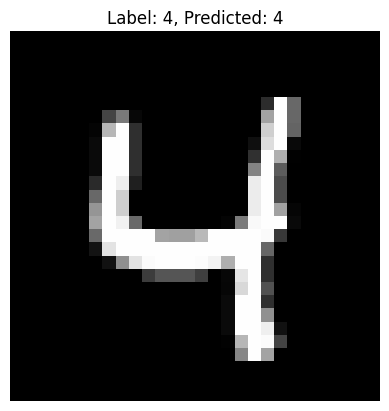

In [ ]:
import random

# Definir o modelo para o modo de avaliação
model.eval()

# Selecionar uma imagem aleatória do dataset de teste
random_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[random_index]

# Mover a imagem para o dispositivo
image = image.to(device)

# Forward pass para obter o label previsto
output = model(image.unsqueeze(0))
_, predicted_label = torch.max(output, 1)

# Converter o tensor da imagem para um array numpy
image_np = image.cpu().numpy()

# Exibir a imagem, seu label verdadeiro e o label previsto
plt.imshow(image_np.squeeze(), cmap='gray')
plt.title(f"Rótulo: {label}, Previsto: {predicted_label.item()}")
plt.axis('off')
plt.show()
